<a href="https://colab.research.google.com/github/lagarcian/ProyectodeGradoLuisGarcia/blob/main/Campos_Aleatorios_Gaussianos_a_partir_de_EDPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Antes de iniciar la simulación vamos a solucionar la ecuación diferencial $\nabla^2f(x,y)= \frac{\partial ^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} $.

Entonces primero manufacturamos una solución $u$ de tal manera que se cumpla $-\nabla^2 u +au=af(x,y)$ donde $a$ es una constante, definida en $\Omega = (0,1) \times (0,1), u(0,y)=u(1,y), y \in [0,1], u(x,0)=u(x,1), x \in [0,1]$

Discretizando en el eje $(i,j)$

$$ \begin{equation}  
\begin{matrix}
& \cdot_{(i,j+1)} & \\
\cdot_{(i-1,j)} & \cdot_{(i,j)} & \cdot_{(i+1,j)} \\
&\cdot_{(i,j-1)} \end{matrix}
\end{equation} $$

In [ ]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from numpy.linalg import solve, norm
from numpy.random import rand
import numpy as np
import time
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:

la=0.4
No = 1/(np.sqrt((2*np.pi))) #Constante de normalización
a=1/la**2 #parametro en donde la=lambda
sigma=1
d=1
def u_ma(x, y):
     #Primero escribimos la solución manufacturada u_ma
    return a*np.sin(x)*np.sin(y)
#Debe regresar un número aleatorio. Gaussiano. y esto multiplicarlo por a=1/k^2 y ajustar la ecuación diferencial y que va a ser k^2 np.randn
def f(x, y, la, sigma=1):
        #Aqui hallamos las f(x,y,a) para poder escribirla y usarla como solución la ecucación diferencial
    return No*sigma*(la**(-2+d/2))*np.random.randn()# Ruido blanco estandarizado  multiplicado por las constantes

def get_A_b(n, la=1, sigma2=1):
    if n <= 0:
        raise ValueError("n debe ser mayor que 0")

    L = 2.0*np.pi
    h = L / n
    a = 1/la**2
    sigma = np.sqrt(sigma2)
    N = n**2
    A = np.zeros((N, N))
    B = np.zeros(N)

    for i in range(n):
        for j in range(n):
            xi = i * h
            yj = j * h
            index_c = i + j*(n) # center
            index_r = i + 1 + j*(n) # right
            index_l = i - 1 + j*(n) # left
            index_b = i + (j-1)*(n) # bottom
            index_t = i + (j+1)*(n) # top

            if i==0:
            # significa que estoy en el borde izquierdo
            # por cond periód, i=0 coincide con i=n
                index_l = n - 1 + j*(n) # left    se modificó

            if i==n-1:
            # significa que estoy a un paso del borde derecho
            # por cond periód, i=n coincide con i=0
                index_r = 0 + j*(n) # right    se modificó

            if j==0:
            # significa que estoy en el borde inferior
            # por cond periód, j=0 coincide con j=n
                index_b = i + (n-1)*(n) # bottom    se modificó

            if j==n-1:
            # significa que estoy a un paso del borde superior
            # por cond periód, j=n coincide con j=0
                index_t = i + (0)*(n) # top      se modificó

            # ahora que conocemos todos los índices apropiados, llenamos la fila
            A[index_c, index_c] = 4 + a * h ** 2
            A[index_c, index_r] = -1
            A[index_c, index_l] = -1
            A[index_c, index_b] = -1
            A[index_c, index_t] = -1

            B[index_c] = h ** 2 * f(xi, yj, la, sigma)

    # print(A)
    #U = np.linalg.solve(A,B)
    U = spsolve(A, B)
    Z = U.reshape((n,n))
    return Z

In [ ]:
def WNo(n, la): #Función para generar ruido blanco estandarizado.
    if n <= 0:
        raise ValueError("n debe ser mayor que 0")

    L = 2.0*np.pi
    h = L / n
    N = n**2
    A = np.zeros((N, N))
    B = np.zeros(N)
    a=1/la**2

    for i in range(n):
        for j in range(n):
            xi = i * h
            yj = j * h
            index_c = i + j*(n) # center
            index_r = i + 1 + j*(n) # right
            index_l = i - 1 + j*(n) # left
            index_b = i + (j-1)*(n) # bottom
            index_t = i + (j+1)*(n) # top

            if i==0:
            # significa que estoy en el borde izquierdo
            # por cond periód, i=0 coincide con i=n
                index_l = n - 1 + j*(n) # left    se modificó

            if i==n-1:
            # significa que estoy a un paso del borde derecho
            # por cond periód, i=n coincide con i=0
                index_r = 0 + j*(n) # right    se modificó

            if j==0:
            # significa que estoy en el borde inferior
            # por cond periód, j=0 coincide con j=n
                index_b = i + (n-1)*(n) # bottom    se modificó

            if j==n-1:
            # significa que estoy a un paso del borde superior
            # por cond periód, j=n coincide con j=0
                index_t = i + (0)*(n) # top      se modificó

            # ahora que conocemos todos los índices apropiados, llenamos la fila
            A[index_c, index_c] = 4 + a * h ** 2
            A[index_c, index_r] = -1
            A[index_c, index_l] = -1
            A[index_c, index_b] = -1
            A[index_c, index_t] = -1

            B[index_c] = h ** 2 * f(xi, yj, la)

    # print(A)
    #U = np.linalg.solve(A,B)
    #U = spsolve(A, B)
    return B

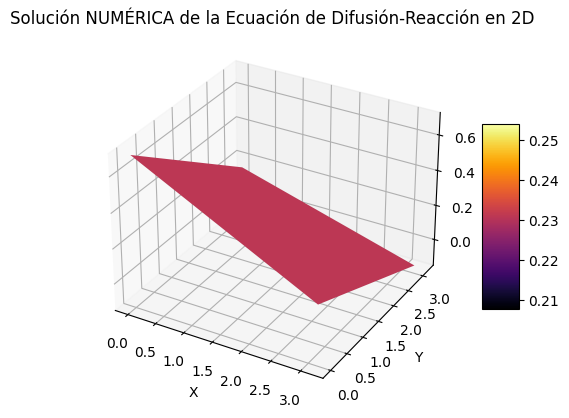

Error en norma max = 0.7072130994524067


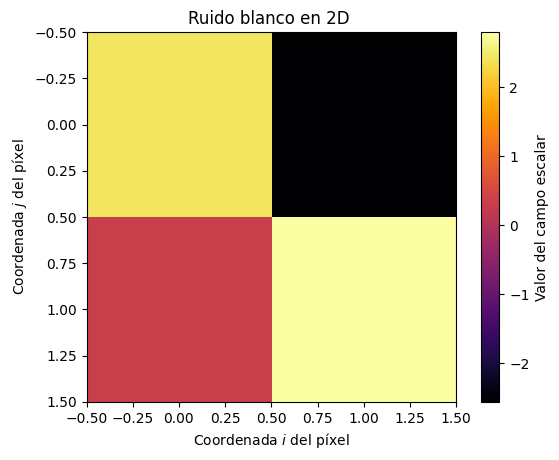

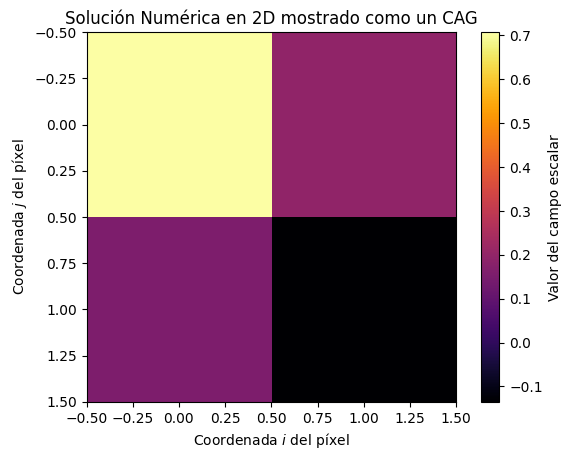

In [ ]:

n =2
L=2.0*np.pi
h=L/n
sigma2=1
la=1
B = WNo(n,la) #Arreglo de ruido blanco
U = get_A_b(n,la,sigma2) #Arreglo de la solución U

# graficamos la superficie correspondiente a la solución numérica
X, Y = np.meshgrid(np.linspace(0, L-h, n), np.linspace(0, L-h, n))
Z = U.reshape((n , n )) #Se reorganiza la solución en una matriz.
Z_WN = B.reshape((n,n)) #Se reorganiza el ruido blanco en una matriz.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='inferno', linewidth=0.01, antialiased=False, edgecolors='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U num')
plt.title('Solución NUMÉRICA de la Ecuación de Difusión-Reacción en 2D')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(np.min(Z), np.max(Z))
plt.show()

#Aqui generamos la imagen como un ruido que aparece en una pantalla de TV
fig1 = plt.figure()
imagen =plt.imshow(Z_WN, cmap='inferno')
positions = np.linspace(0,len(Z_WN), 6)
labels = np.linspace(0,1,6)
plt.title('Ruido blanco en 2D ')
plt.xlabel('Coordenada $i$ del píxel')
plt.ylabel('Coordenada $j$ del píxel')
plt.colorbar(imagen, label='Valor del campo escalar');
plt.savefig('RBM2', dpi=300)

fig2 = plt.figure()
imagen2 =plt.imshow(Z, cmap='inferno')
positions = np.linspace(0,len(Z), 6)
labels = np.linspace(0,1,6)
plt.title('Solución Numérica en 2D mostrado como un CAG')
plt.xlabel('Coordenada $i$ del píxel')
plt.ylabel('Coordenada $j$ del píxel')
plt.colorbar(imagen2, label='Valor del campo escalar');
plt.savefig('CAGM2', dpi=300)


# graficamos la superficie correspondiente a la solución exacta (manufacturada)
Z_ma= u_ma(X,Y)


# calculamos una norma del error
print('Error en norma max =',np.max(np.max(Z-Z_ma)))

In [ ]:
def GRF(M, sigma2, l):
    '''Genera una realización aleatoria de un campo aleatorio gaussiano
    de vector de medias = 0, en la región [0,1]x[0,1] del plano
    utilizando una función de covarianza exponencial
    de parámetros sigma2, l, es decir:
    C(t1, t2) = sigma2 * exp(- norm(t1 - t2)/l)
    sigma2 es la varianza del campo en cada punto.
    l es la longitud de correlación.
    M es el número de subdivisiones de cada eje.
    La función devuelve un array de dimensiones (M, M) con el valor
    del campo escalar en cada punto
    '''
    # Los nodos t_n del dominio D = [0,1]x[0,1] se supondrán ordenados secuencialmente:
    #[(0,0), (0,1/M),...,(0,(M-1)/M),(1/M,0),...,(1/M,(M-1)/M),...,((M-1)/M, 0),...,((M-1)/M,(M-1)/M)]
    #generaremos una lista con las coordenadas de los nodos en el mismo orden que aparecerán en
    #las filas y columnas de la matriz de covarianza
    nodos = [(i/M,j/M) for i in range(M) for j in range(M)]
    #Generación de la matriz de covarianza Sigma
    x,y = zip(*nodos)
    X1, X2 = np.meshgrid(x,x)
    Y1, Y2 = np.meshgrid(y,y)
    Sigma = sigma2 * np.exp(-np.sqrt((X1 - X2)**2 +(Y1 - Y2)**2)/l)
    #Ahora hacemos la descomposición de Cholesky de Sigma
    L = np.linalg.cholesky(Sigma)
    np.random.seed(1)    #Fijamos una semilla para hacer reproducible el resultado
    Z = np.random.randn(len(nodos))    # Vector de M*M variables independientes N(0,1)
    N = np.dot(L, Z) #Generamos un vector aleatorio gaussiano N(0, Sigma) de longitud M*M
    N2D = np.zeros((M,M))
    for i in range(len(nodos)):
        a, b = divmod(i,M)    #indices en el array N2D
        N2D[a,b] = N[i]
    return N2D

ValueError: ignored

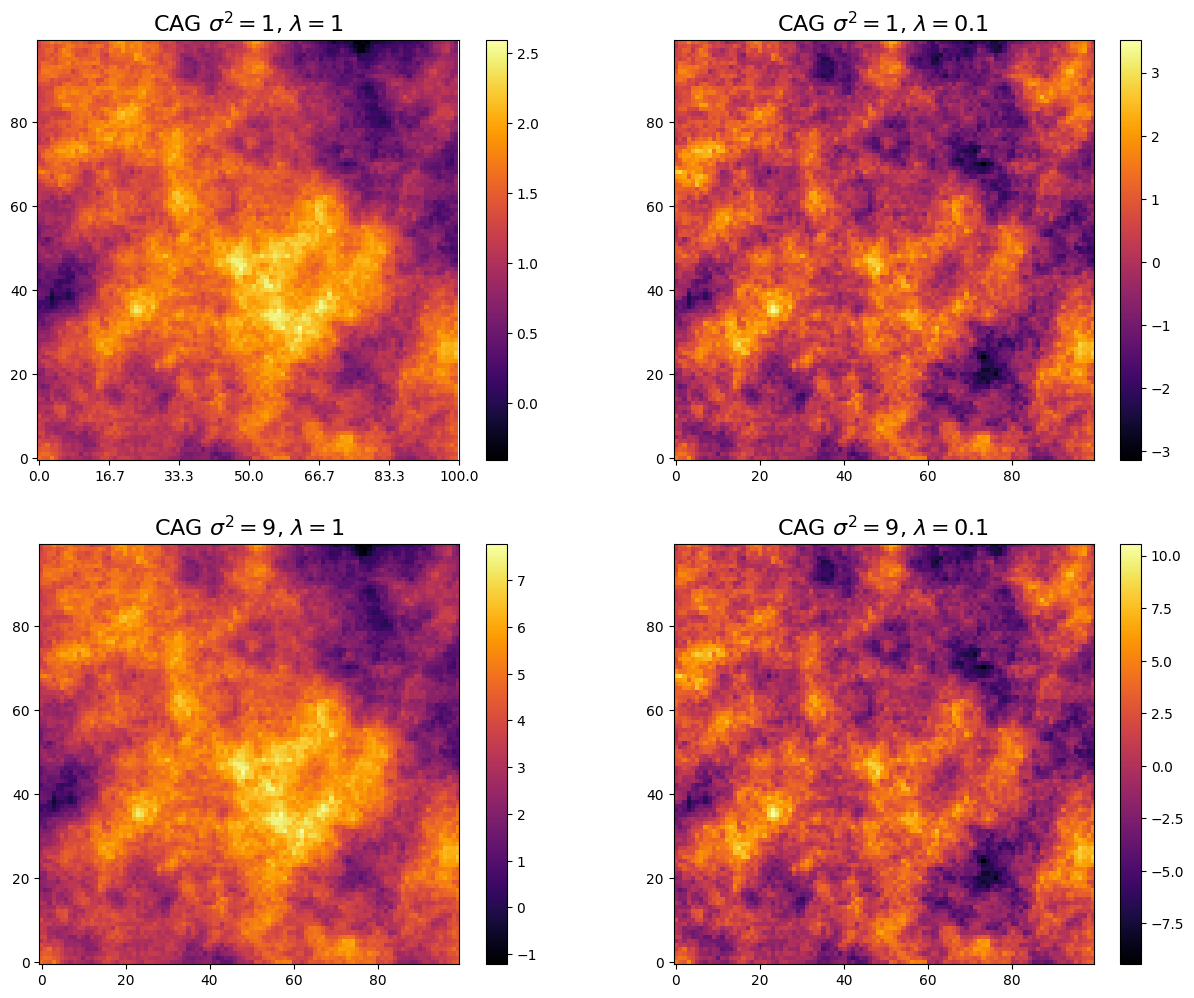

In [ ]:
M = 100
#Aqui vemos los distintos campos gaussianos variando sigma^2 y lambda

positions = np.linspace(0,M,7)
labels = np.linspace(0,1,4)
fig, ax = plt.subplots(2,2, figsize=(15, 12))
im = ax[0,0].imshow(GRF(M, 1, 1).T, origin='lower', cmap='inferno')
ax[0,0].set_title(r'CAG $\sigma^2 = 1$, $\lambda=1$', fontsize=16)
fig.colorbar(im, ax = ax[0,0])

im = ax[0,1].imshow(GRF(M, 1, 0.1).T, origin='lower' , cmap='inferno')
ax[0,1].set_title(r'CAG $\sigma^2 = 1$, $\lambda=0.1$', fontsize=16)
fig.colorbar(im, ax = ax[0,1])

im = ax[1,0].imshow(GRF(M, 9, 1).T, origin='lower', cmap='inferno')
ax[1,0].set_title(r'CAG $\sigma^2 = 9$, $\lambda=1$', fontsize=16)
fig.colorbar(im, ax = ax[1,0])

im = ax[1,1].imshow(GRF(M, 9, 0.1).T, origin='lower', cmap='inferno')
ax[1,1].set_title(r'CAG $\sigma^2 = 9$, $\lambda=0.1$', fontsize=16)
fig.colorbar(im, ax = ax[1,1])

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set_xticks(positions)
        ax[i,j].set_xticklabels(labels)
        ax[i,j].set_yticks(positions)
        ax[i,j].set_yticklabels(labels)

ValueError: ignored

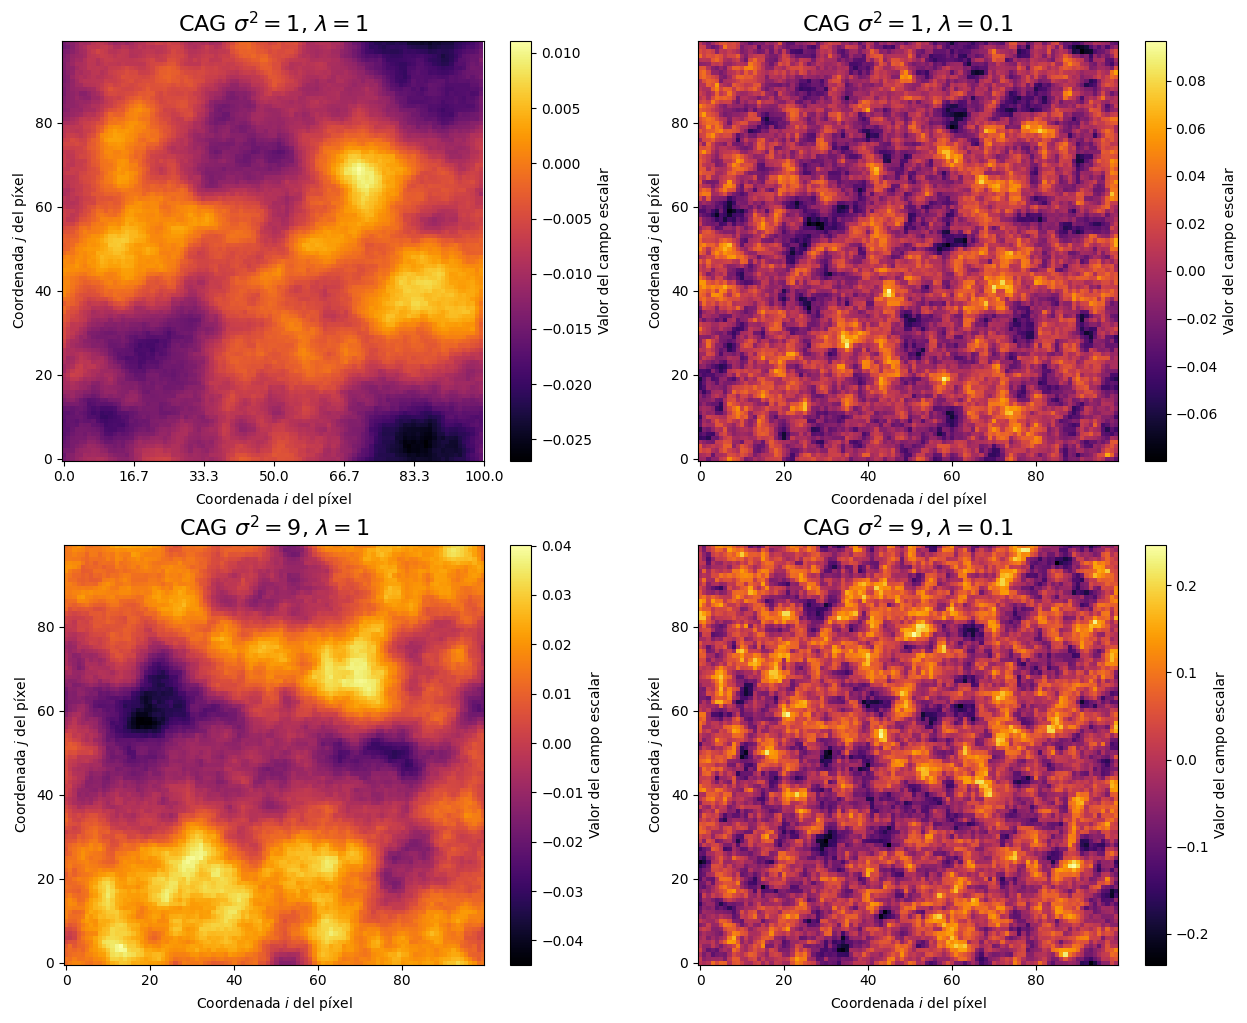

In [ ]:
n = 100

#Aqui vemos los distintos campos gaussianos variando sigma^2 y lambda
positions = np.linspace(0,n,7)
labels = np.linspace(0,1,3)
fig, ax = plt.subplots(2,2, figsize=(15, 12))
im = ax[0,0].imshow(get_A_b(n, 1, 1).T, origin='lower', cmap='inferno')
ax[0,0].set_title(r'CAG $\sigma^2 = 1$, $\lambda=1$', fontsize=16)
#Etiquetas
fig.colorbar(im, ax = ax[0,0], label='Valor del campo escalar')
ax[0, 0].set_xlabel('Coordenada $i$ del píxel')
ax[0, 0].set_ylabel('Coordenada $j$ del píxel')


im = ax[0,1].imshow(get_A_b(n, 0.1, 1).T, origin='lower' , cmap='inferno')
ax[0,1].set_title(r'CAG $\sigma^2 = 1$, $\lambda=0.1$', fontsize=16)
#Etiquetas
fig.colorbar(im, ax = ax[0,1], label='Valor del campo escalar')
ax[0, 1].set_xlabel('Coordenada $i$ del píxel')
ax[0, 1].set_ylabel('Coordenada $j$ del píxel')


im = ax[1,0].imshow(get_A_b(n, 1, 9).T, origin='lower', cmap='inferno')
ax[1,0].set_title(r'CAG $\sigma^2 = 9$, $\lambda=1$', fontsize=16)
#Etiquetas
fig.colorbar(im, ax = ax[1,0], label='Valor del campo escalar')
ax[1, 0].set_xlabel('Coordenada $i$ del píxel')
ax[1, 0].set_ylabel('Coordenada $j$ del píxel')


im = ax[1,1].imshow(get_A_b(n, 0.1, 9).T, origin='lower', cmap='inferno')
ax[1,1].set_title(r'CAG $\sigma^2 = 9$, $\lambda=0.1$', fontsize=16)
#Etiquetas
fig.colorbar(im, ax = ax[1,1], label='Valor del campo escalar')
ax[1, 1].set_xlabel('Coordenada $i$ del píxel')
ax[1, 1].set_ylabel('Coordenada $j$ del píxel')


for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set_xticks(positions)
        ax[i,j].set_xticklabels(labels)
        ax[i,j].set_yticks(positions)
        ax[i,j].set_yticklabels(labels)

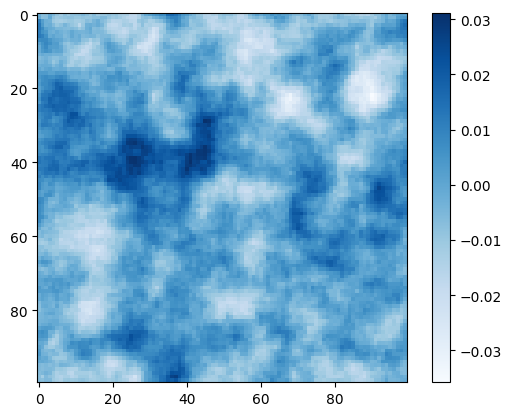

In [ ]:


imagen =plt.imshow(Z, cmap='Blues')
positions = np.linspace(0,len(Z), 10)
labels = np.linspace(0,1,6)
plt.colorbar(imagen);
imagen.autoscale()
#plt.pcolormesh(imagen, cmap='inferno')

In [ ]:


start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.001546621322631836


6.859408378601074


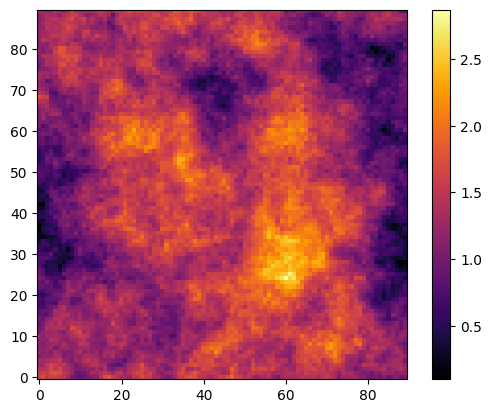

In [ ]:
M=90 # con este código se toma el tiempo de ejecución.
#30, 60, 120, 128
start = time.time()
im = plt.imshow(GRF(M, 1, 1).T, origin='lower', cmap='inferno')
plt.colorbar(im)
end = time.time()
print(end - start)


/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_dsolve/linsolve.py:229: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


451.6441397666931


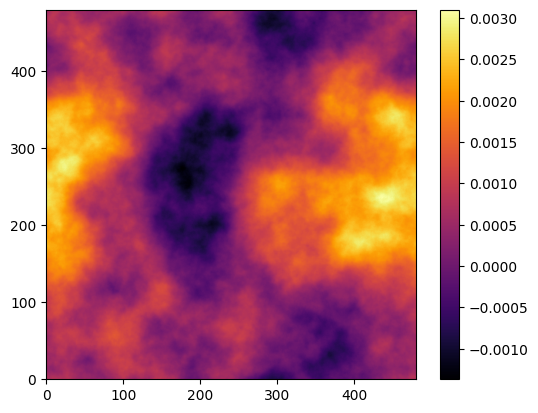

In [ ]:
M=480
start = time.time()
im2 = im = plt.imshow(get_A_b(M, 1, 1).T, origin='lower', cmap='inferno')
plt.colorbar(im2)
end=time.time()
print(end-start)

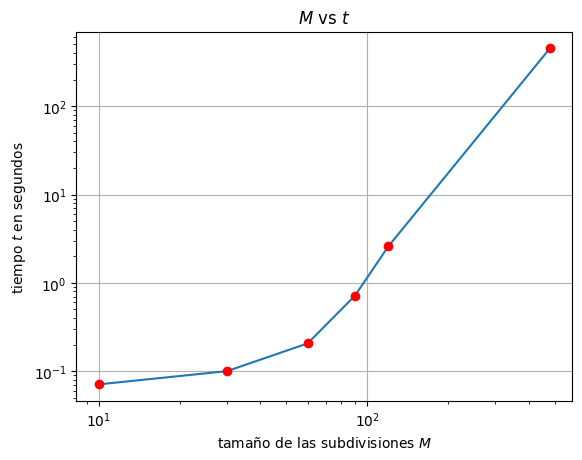

3.7206237641832494


<Figure size 640x480 with 0 Axes>

In [ ]:
M_0=10
t_0=0.07114005088806152
M_1=30
t_1=0.10027027130126953
M_2=60
t_2=0.20681238174438477
M_4=120
t_4=2.5987091064453125
M_3=90
t_3=0.7165088653564453
M_5=480
t_5=451.6441397666931

Ms=[M_0,M_1,M_2,M_3,M_4,M_5]
ts=[t_0,t_1,t_2,t_3,t_4,t_5]
#Usa una memoria RAM de 1.5 GB

plt.loglog(Ms,ts)
#plt.loglog(Ms,ts)
plt.grid()
x=Ms
y=ts

plt.xlabel("tamaño de las subdivisiones $M$ ")
plt.ylabel("tiempo $t$ en segundos ")
plt.title('$M$ vs $t$')
plt.plot(x,y,"ro")
plt.show()
plt.savefig("Mvst.png",dpi=300,bbox_inches='tight')

pendiente=( np.log(ts[-2] ) -np.log(ts[-1]) )/ ( np.log(Ms[-2]) - np.log(Ms[-1]) )
print(pendiente)

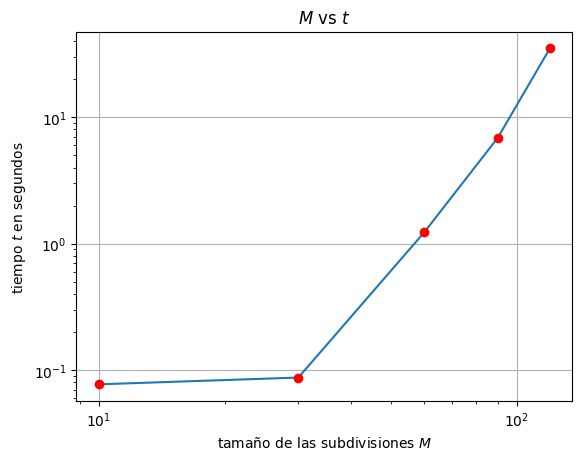

5.669327558217381


<Figure size 640x480 with 0 Axes>

In [ ]:
M_0=10
t_0=0.07716488838195801
M_1=30
t_1=0.0872795581817627
M_2=60
t_2=1.2265408039093018
M_3=90
t_3=6.859408378601074
M_4=120
t_4=35.043323040008545

Ms=[M_0,M_1,M_2,M_3,M_4]
ts=[t_0,t_1,t_2,t_3,t_4]
#Usa una memoria RAM de 1.5 GB

plt.loglog(Ms,ts)
#plt.loglog(Ms,ts)
plt.grid()
x=Ms
y=ts

plt.xlabel("tamaño de las subdivisiones $M$ ")
plt.ylabel("tiempo $t$ en segundos ")
plt.title('$M$ vs $t$')
plt.plot(x,y,"ro")
plt.show()
plt.savefig("Mvst.png",dpi=300,bbox_inches='tight')
pendiente=( np.log(ts[-2] ) -np.log(ts[-1]) )/ ( np.log(Ms[-2]) - np.log(Ms[-1]) )
print(pendiente)
